# MIMICモデル & PLSモデル

## 多重指標モデル

複数の観測変数によって測定される構成概念（潜在変数）同士の関係性を回帰分析にかけるようなモデル


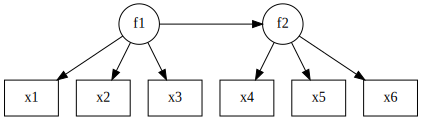

In [20]:
import graphviz

graphviz.Source("""
digraph g {
    graph [rankdir = TB];
    node [shape = rectangle];
    x1, x2, x3, x4, x5, x6

    node [shape = circle]
    f1 -> f2
    
    f1 -> {x1, x2, x3}
    f2 -> {x4, x5, x6}

    { rank = same; f1; f2 }
}
""")

## 正準相関分析モデル

複数の潜在変数同士の相関関係を分析するモデルを**正準相関分析（Canonical Correlation Analysis: CCA）**モデルという（[豊田 (1991)](https://www.jstage.jst.go.jp/article/jjep1953/39/4/39_467/_pdf)）。



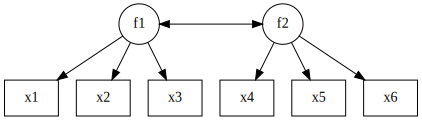

In [28]:
import graphviz

graphviz.Source("""
digraph g {
    graph [rankdir = TB];
    node [shape = rectangle];
    x1, x2, x3, x4, x5, x6

    node [shape = circle]
    f1 -> f2 [dir = both]
    
    f1 -> {x1, x2, x3}
    f2 -> {x4, x5, x6}

    { rank = same; f1; f2 }
}
""")

## MIMICモデル

**MIMIC (Multiple Indicator Multiple Cause) モデル**は、観測変数$x4,x5,x6$をまとめた合成変数$f1$（共通因子）を別の観測変数$x1,x2,x3$に回帰するという、因子分析と回帰分析を組み合わせたようなモデル。


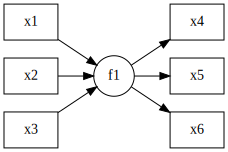

In [23]:
import graphviz

graphviz.Source("""
digraph g {
    graph [rankdir = LR];
    node [shape = rectangle];
    x1, x2, x3, x4, x5, x6

    node [shape = circle]
    f1
    
    {x1, x2, x3} -> f1
    f1 -> {x4, x5, x6}
}
""")

### 歴史

経済学者のArthur Goldbergerが統計学者との共著で1975年に提案


### 関連文献

[Charles F. Manski, "Arthur S. Goldberger", Biographical Memoirs of the National Academy of Sciences (2013)](http://www.nasonline.org/publications/biographical-memoirs/memoir-pdfs/goldberger-arthur.pdf)

- ManskiによるGoldbergerの業績についての記述
- GoldbergerはMIMICモデルだけでなく、"mean independence"の提案やSelection Biasに関する研究など因果推論への貢献も多いとのこと


## PLSモデル (Partial Least Square Model)

MIMICモデルにおける合成変数を別の因子の説明に使ったもの。

観測変数の線形和による合成変数（作成した指標）が別の共通因子にどのくらい影響しているかを測る。


観測変数をまとめた合成変数から、別の複数の観測変数の潜在変数に与える影響の強さを検討するモデル

多重指標モデルでは「潜在変数→観測変数」というパス（観測変数に共通する潜在的な因子）を引いて測定するのみだった。
PLSでは「潜在変数→観測変数」という方向のパスだけでなく「観測変数→潜在変数」の方向のパスも両方含まれる

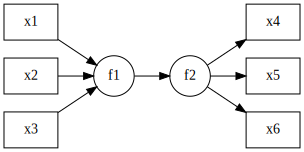

In [25]:
import graphviz

graphviz.Source("""
digraph g {
    graph [rankdir = LR];
    node [shape = rectangle];
    x1, x2, x3, x4, x5, x6

    node [shape = circle]
    f1 -> f2
    
    {x1, x2, x3} -> f1
    f2 -> {x4, x5, x6}
}
""")

### semopyによる実行例

In [32]:
import numpy as np
import pandas as pd

# データ生成
n = 1000
np.random.seed(0)

r_12 = 0.1  # x1とx2の関連性（f1）
x1 = np.random.normal(size=n)
x2 = r_12 * x1 + np.random.uniform(size=n)

r_f1f2 = 0.5 # f1とf2の関連性
r_34 = 0.5 * r_f1f2
x3 = np.random.normal(size=n)
x4 = r_34 * x3 + np.random.uniform(size=n)

data = pd.DataFrame(dict(x1=x1, x2=x2, x3=x3, x4=x4))

f1の分散は0に固定する（誤差項を想定せず、単なる重み付き和による合成変数ということ）

※このような定数に固定した母数は**固定母数（fixed parameter）**という

In [48]:
import semopy
desc = """
f1 ~ x1 + x2
f2 =~ x3 + x4
f1 =~ f2
f1 ~~ 0*f1

f2 ~~ f2
x1 ~~ x1
x2 ~~ x2
x3 ~~ x3
x4 ~~ x4

x1 ~~ x2
x3 ~~ x4
"""
model = semopy.Model(desc)
model.fit(data)
model.inspect(std_est=True).round(2)

,lval,op,rval,Estimate,Est. Std,Std. Err,z-value,p-value
0,f1,~,x1,-0.03,-0.71,0.023718,-1.1484,0.250803
1,f1,~,x2,-0.06,-0.48,0.057586,-1.001833,0.316424
2,f2,~,f1,1.00,0.12,-,-,-
3,x3,~,f2,1.00,0.33,-,-,-
4,x4,~,f2,-0.50,-0.44,0.638508,-0.783489,0.43334
5,f1,~~,f1,0.00,0.00,-,-,-
6,f2,~~,f2,0.10,0.99,468442.904933,0.0,1.0
7,x1,~~,x1,0.97,1.00,0.043569,22.36068,0.0
8,x1,~~,x2,0.12,0.38,0.010516,11.231212,0.0
9,x2,~~,x2,0.10,1.00,0.004436,22.36068,0.0


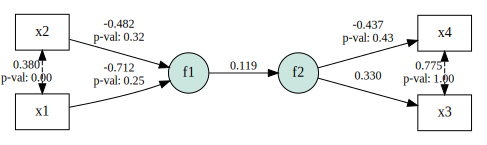

In [41]:
# パス図
g = semopy.semplot(model, filename="/tmp/path_diagram.png", plot_covs=True, std_ests=True)

with g.subgraph() as s:
    s.attr(rank = "same")
    s.node("x1")
    s.node("x2")

with g.subgraph() as s:
    s.attr(rank = "same")
    s.node("x3")
    s.node("x4")
    
g.attr(rankdir = "LR")
g.attr(pad = "0.2") # padding
g

### PLS, CCAはscikit-learnにも実装がある

[sklearn.cross_decomposition.PLSRegression — scikit-learn 1.3.2 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cross_decomposition.PLSRegression.html)

推定結果は結構違う、アルゴリズムも違うっぽい

In [43]:
from sklearn.cross_decomposition import PLSRegression
X = data[["x1", "x2"]]
Y = data[["x3", "x4"]]
pls = PLSRegression(n_components=1)
pls.fit(X, Y)
pls.coef_

array([[-0.02380083, -0.02041537],
       [ 0.01237008,  0.01061055]])

In [45]:
pls.x_loadings_

array([[0.73164947],
       [0.68297665]])

In [46]:
pls.y_loadings_

array([[-0.03267168],
       [ 0.04496658]])

### 関連文献

Lohmöller, J. B. (1989). The Basic and the Extended PLS Method. Latent Variable Path Modeling with Partial Least Squares, 27-61.

- PLSを主軸にした教科書。豊田（2003）（疑問編）で紹介されていた
- [SpringerLink](https://link.springer.com/chapter/10.1007/978-3-642-52512-4_2)
- [Google ブックス](https://books.google.co.jp/books?hl=ja&lr=lang_ja%7Clang_en&id=xU_mCAAAQBAJ&oi=fnd&pg=PA11&dq=Latent+Variable+Path+Modeling+with+Partial+Least+Squares&ots=r0UMdL6vxS&sig=fw7I8kg47jjsQR3_DnaeFDCgaUY#v=onepage&q=Latent%20Variable%20Path%20Modeling%20with%20Partial%20Least%20Squares&f=false)

[Kelly, B., & Pruitt, S. (2013). Market expectations in the cross‐section of present values. The Journal of Finance, 68(5), 1721-1756.](https://citeseerx.ist.psu.edu/document?repid=rep1&type=pdf&doi=502b24b0277cf026c6b75111d3537874db9463d2)

- PLSを株価予測に応用したもの
- 特徴量を低次元に圧縮して予測する